In [1]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Define the Height, weight and shoe size

In [3]:
X = [[179,85,9], [169,65,6], [172,60,7], [183,85,8], [175,75,8], [163,60,7], [179,70,8], [191,95,11], [172,65,8], [184,75,8], [175,50,7], [177,60,8], [178,70,8], [186,76,8], [180,80,10], [159,40,6], [179,40,7]]

In [4]:
Y = ['Male', 'Female', 'Female','Male','Male','Female','Male','Male','Female','Male','Male','Female','Female','Male', 'Male', 'Female', 'Female']

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)


<h2> Build a decision Tree Classifier </h2>

In [6]:
model = tree.DecisionTreeClassifier()

In [7]:
trained_model_dt = model.fit(X_train,y_train)

[Text(133.92000000000002, 190.26, 'X[1] <= 67.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(200.88000000000002, 135.9, 'X[1] <= 72.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 178.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

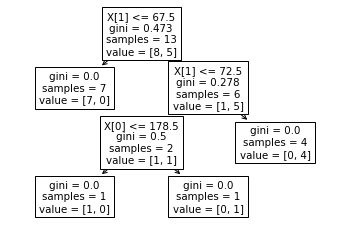

In [8]:
# Plot the tree
tree.plot_tree(trained_model_dt)

In [9]:
print("X_test is :", X_test)
print("y_test is :", y_test)

X_test is : [[179, 85, 9], [180, 80, 10], [175, 50, 7], [186, 76, 8]]
y_test is : ['Male', 'Male', 'Male', 'Male']


In [10]:
prediction_dt = trained_model_dt.predict(X_test)

In [11]:
print(prediction_dt)

['Male' 'Male' 'Female' 'Male']


In [12]:
#metrics.accuracy_score(y_test, prediction_dt)

<h2> Build a K-Nearest Neighbour Classifier </h2>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

How to find Best k?

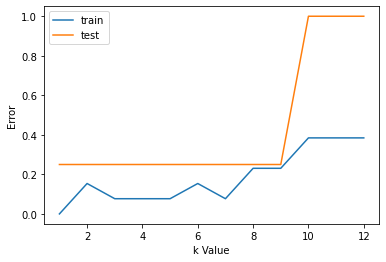

In [17]:
error1= []
error2= []
for k in range(1,13):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,13),error1,label="train")
plt.plot(range(1,13),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

Minimum error:- 0.25 at K = 0


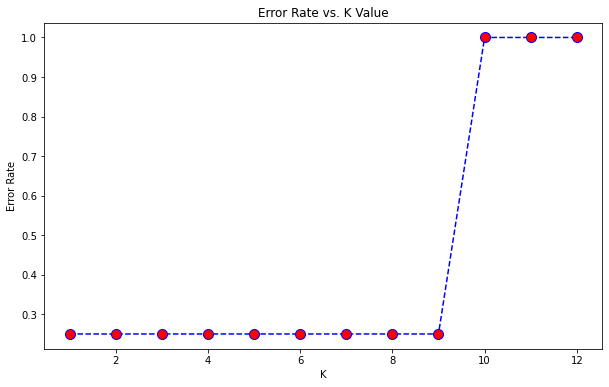

In [18]:
# Error plot 
error_rate = []
for i in range(1,13):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,13),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.75 at K = 0


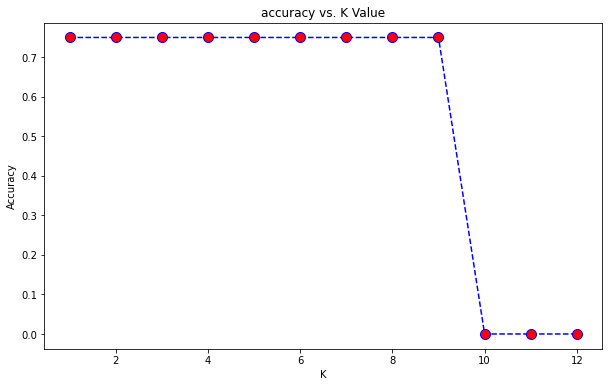

In [19]:
# Accuracy Plot
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,13):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,13),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [21]:
# Best k-value is when the Training error and test error are low or when the accuracy is high. So in this case we can choose k = 3, 4 or 5

In [33]:
model_knn = KNeighborsClassifier(n_neighbors = 4)
trained_model_knn = model_knn.fit(X_train,y_train)
prediction_knn = trained_model_knn.predict(X_test)
print(prediction_knn)
print(y_test)
metrics.accuracy_score(y_test, prediction_knn)

['Male' 'Male' 'Female' 'Male']
['Male', 'Male', 'Male', 'Male']


0.75

<h2> Build Random Forest </h2>

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_random_rf = RandomForestClassifier()
train_model_rf = model_random_rf.fit(X_train, y_train)
predictions_rf = train_model_rf.predict(X_test)
print(predictions_rf)
print(y_test)
metrics.accuracy_score(y_test, predictions_rf)

['Male' 'Male' 'Female' 'Male']
['Male', 'Male', 'Male', 'Male']


0.75

In [ ]:
#Decision tree has accuracy of 100 which means it is getting overfitted. Hence the best model will be either KNN or Randome forest as it has 75% accuracy